<a href="https://colab.research.google.com/github/j88620714/DataScience/blob/master/HW1/Box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install gspread
!pip install oauth2client
!pip install Pillow
!pip install -U -q PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1_7FyladR7eGnmUjsCvNF1XnpVZpuNGXm' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  #fname = os.path.join(local_download_path, f['title'])
  fname = os.path.join('/content', f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)
!ls "/root/data"

title: Box.ipynb, id: 1_xaM3WhBd-i9nEFMtUWAuy8KBS298QQF
downloading to /content/Box.ipynb
title: linePlot_TwoLines.ipynb, id: 1-m9LEIK5RHWw6gVtKNfuecEbUJbxsBvh
downloading to /content/linePlot_TwoLines.ipynb
title: Frechet.ipynb, id: 1rjh78sM8vRXoyqdOgDt7YAYgchjawvHG
downloading to /content/Frechet.ipynb
title: 標記顯著速度差異.ipynb, id: 1AM9X_LwPT7wA4lDu42OQ-tbc23q_vedD
downloading to /content/標記顯著速度差異.ipynb
title: 復興南路2.ipynb, id: 1QyxaBmyotcR5YhBxm7rtT7xlnma5byNr
downloading to /content/復興南路2.ipynb
title: NotoSansCJKtc-Regular.otf, id: 1fY1VCoDLMTrMyEQLrXghet2ZJjKX3iZv
downloading to /content/NotoSansCJKtc-Regular.otf


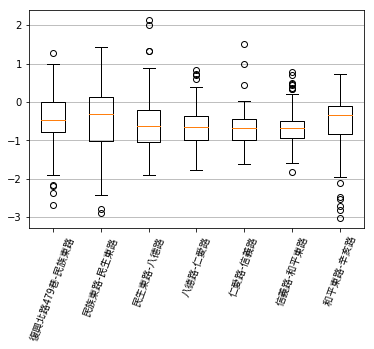

In [0]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from oauth2client.client import GoogleCredentials
from google.colab import auth
from google.colab import files
auth.authenticate_user()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.display import Image

gc = gspread.authorize(GoogleCredentials.get_application_default())
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1FJPf9S2vpimDZvefrpnfq31cq3JpmySHse74WQoEgu4/edit?ts=5c8895e5#gid=618695640')
wks4 = sh.worksheet("復興南北路")

y1=wks4.col_values(20)
y2=wks4.col_values(21)
y3=wks4.col_values(22)
y4=wks4.col_values(23)
y5=wks4.col_values(24)
y6=wks4.col_values(25)
y7=wks4.col_values(26)
for i in range(45):
  y1.pop(0)
  y2.pop(0)
  y3.pop(0)
  y4.pop(0)
  y5.pop(0)
  y6.pop(0)
  y7.pop(0)
for i in range(12):
  y1.pop()
  y2.pop()
  y3.pop()
  y4.pop()
  y5.pop()
  y6.pop()
  y7.pop()
for i in range(len(y1)):
  y1[i]=eval(y1[i])
  y2[i]=eval(y2[i])
  y3[i]=eval(y3[i])
  y4[i]=eval(y4[i])
  y5[i]=eval(y5[i])
  y6[i]=eval(y6[i])
  y7[i]=eval(y7[i])
#print(y1)
fig = plt.figure()  # 创建画布
ax = plt.subplot()  # 创建作图区域
# 蓝色矩形的红线：50%分位点是4.5,上边沿：25%分位点是2.25,下边沿：75%分位点是6.75
ax.boxplot([y1, y2, y3,y4,y5,y6,y7])
ax.set_xticks([1, 2, 3,4,5,6,7])
fontPath = 'NotoSansCJKtc-Regular.otf'
font30 = fm.FontProperties(fname=fontPath, size=10)
ax.set_xticklabels(['復興北路479巷-民族東路', '民族東路-民生東路', '民生東路-八德路','八德路-仁愛路','仁愛路-信義路',	'信義路-和平東路','	和平東路-辛亥路'],fontproperties=font30,rotation=70)
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()
